In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [15]:
den=cv2.imread('C:/Users/bhudi/Desktop/New folder/UDEMY/Computer-Vision-with-Python/DATA/Denis_Mukwege.jpg',0)
sol=cv2.imread('C:/Users/bhudi/Desktop/New folder/UDEMY/Computer-Vision-with-Python/DATA/solvay_conference.jpg',0)

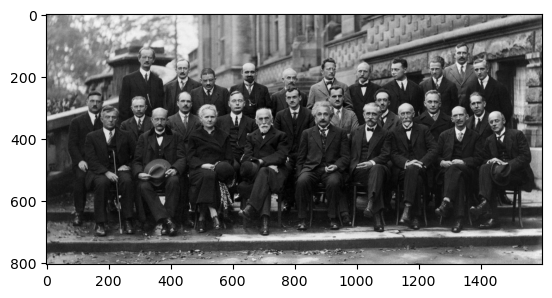

In [16]:
plt.imshow(sol,cmap='gray')

In [17]:
fc=cv2.CascadeClassifier('C:/Users/bhudi/Desktop/New folder/UDEMY/Computer-Vision-with-Python/DATA/haarcascades/haarcascade_frontalface_default.xml')

In [21]:
def det_face_img(img):
    face=img.copy()
    rects=fc.detectMultiScale(face,scaleFactor=1.2,minNeighbors=5)
    for (x,y,w,h) in rects:
        cv2.rectangle(face,(x,y),(x+w,y+h),(0,255,0),7)
    return face

In [22]:
def det_face_vid(img):
    face = img.copy()
    rects = fc.detectMultiScale(face, scaleFactor=1.2, minNeighbors=5)
    for (x, y, w, h) in rects:
        cv2.rectangle(face, (x, y), (x + w, y + h), (0, 255, 0), 7)
    return face, len(rects)

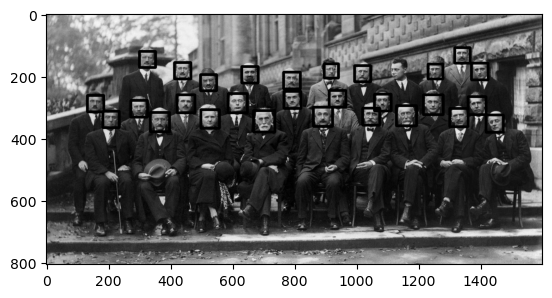

In [23]:
res=det_face_img(sol)
plt.imshow(res,cmap='gray')

In [24]:
cap = cv2.VideoCapture(0)

while True:
    ret, frame = cap.read()
    frame, num_faces = det_face_vid(frame)

    cv2.putText(frame, f'Faces Detected: {num_faces}', (20, 40), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    cv2.imshow('Face Detection', frame)

    if cv2.waitKey(1) == 27:
        break

cap.release()
cv2.destroyAllWindows()